<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/read_image_root_py2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code load ROOT, python 2 environment. Runs this part only the first time.

In [1]:
import sys
print (sys.version, get_ipython())
if 'google.colab' in str(get_ipython()) and sys.version[0:1] in '2':
  print('Running on CoLab')

  # istallazione di ROOT dal CERN
  !mkdir -p APPS
  !pwd
  !cd APPS && wget --no-check-certificate https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
  !cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz

  base_lib_path = '/content/APPS/root/lib/'
  # main paths for ROOT  
  import sys
  sys.path.append(base_lib_path)
  import ctypes
  sys.path.append(base_lib_path)
  ctypes.cdll.LoadLibrary(base_lib_path+'libCore.so')
  ctypes.cdll.LoadLibrary(base_lib_path+'libThread.so')
  ctypes.cdll.LoadLibrary(base_lib_path+'libImt.so')
  ctypes.cdll.LoadLibrary(base_lib_path+'libRIO.so')
  ctypes.cdll.LoadLibrary(base_lib_path+'libNet.so')
  ctypes.cdll.LoadLibrary(base_lib_path+'libTree.so')
  ctypes.cdll.LoadLibrary(base_lib_path+'libMathCore.so')
  ctypes.cdll.LoadLibrary(base_lib_path+'libMatrix.so')
  ctypes.cdll.LoadLibrary(base_lib_path+'libHist.so')
  ctypes.cdll.LoadLibrary(base_lib_path+'libGraf.so')
  # itsllation and root-numpy main PATH
  !pip install root-numpy
  ctypes.cdll.LoadLibrary(base_lib_path+'libMultiProc.so')
  ctypes.cdll.LoadLibrary(base_lib_path+'libGpad.so')
  ctypes.cdll.LoadLibrary(base_lib_path+'libGraf3d.so')
  ctypes.cdll.LoadLibrary(base_lib_path+'libTreePlayer.so')
  # patch to open online FILE
  ! sudo apt-get install libdavix0v5
  ctypes.cdll.LoadLibrary(base_lib_path+'libRDAVIX.so')
  ! echo "Davix.GSI.CACheck: n" >> $ROOTSYS/etc/system.rootrc
  ! cp $ROOTSYS/etc/system.rootrc $HOME/.rootrc
  ! tail -1 $HOME/.rootrc
  
  sys.path.append('.')
  ! mkdir -p data
else:
  print ("non ho fatto nulla ;) non sono su Colab!")

('2.7.17 (default, Feb 27 2021, 15:10:58) \n[GCC 7.5.0]', <google.colab._shell.Shell object at 0x7fd2a3acbb10>)
Running on CoLab
/content
--2021-05-04 12:16:01--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.18.236, 2001:1458:201:ee::100:6
Connecting to root.cern.ch (root.cern.ch)|137.138.18.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz’

root_v6.13.08.Linux 100%[===================>] 131.05M  23.8MB/s    in 6.3s    

2021-05-04 12:16:08 (21.0 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz’ saved [137415272/137415272]

     |████████████████████████████████| 522kB 5.3MB/s 
  Created wheel for root-numpy: filename=root_numpy-4.8.0-cp27-cp27mu-linux_x86_64.whl size=1075508 sha256=3586854e1d45b561b8830dda325e233c38e82f0e3a4a8cbd64b96bbb14d8be5a
  Stored in director

In [2]:
import matplotlib.pyplot as plt
import numpy as np    
import ROOT
import root_numpy as rtnp

%matplotlib inline


def s3_root_file(sel, run):
    BASE_URL  = "https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/cygnus/"
    file_root = ('Data/'+sel+'/histograms_Run%05d.root' % run)
    return BASE_URL+file_root
def root_TH2_name(root_file):
    pic = []
    wfm = []
    for i,e in enumerate(root_file.GetListOfKeys()):
        che = e.GetName()
        if ('pic_run' in str(che)):
            pic.append(che)
        elif ('wfm_run' in str(che)):
            wfm.append(che)
    return pic, wfm

Welcome to JupyROOT 6.13/08


apere file [rum] from [tag] 

In [3]:
run = 4020
tag = "LAB"
print ('Open file: '+s3_root_file(tag, run))
f = ROOT.TFile.Open(s3_root_file(tag, run))
print ('Find Keys: '+str(len(f.GetListOfKeys())))
pic, wfm = root_TH2_name(f)
max_image = len(pic)
max_wfm = len(wfm)
print ("# of Images (TH2) Files: {:d}".format(max_image))
print ("# of Waveform (TH2) Files: {:d} ".format(max_wfm))
image = rtnp.hist2array(f.Get(pic[0])).T
x_resolution = image.shape[1]
y_resolution = image.shape[0]
print ('Camera X, Y pixel: {:d} {:d} '.format(x_resolution, y_resolution))

Open file: https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/cygnus/Data/LAB/histograms_Run04020.root
Find Keys: 100
# of Images (TH2) Files: 100
# of Waveform (TH2) Files: 0 
Camera X, Y pixel: 2304 2304 


show imege file from [ini] to [end]

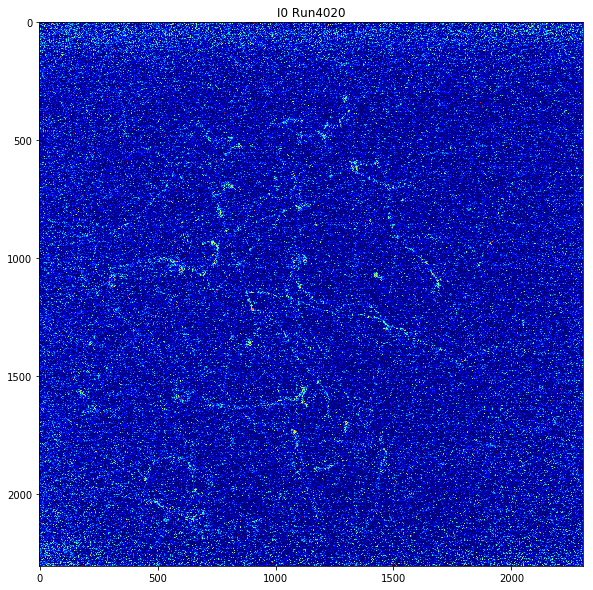

In [4]:
iTr = 0 # numero imagine da leggere
save = False
image = rtnp.hist2array(f.Get(pic[iTr])).T
fig = plt.figure(figsize=(10,10))
plt.title("I%d Run%d" % (iTr, int(run)))
plt.imshow(image,  cmap="jet", vmin=98,vmax=150)
plt.show()